<a href="https://colab.research.google.com/github/Shweta-pi/Food-Delivery-Time-Estimation/blob/main/Food_Delivery_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
uploaded = files.upload()


Saving Dataset.csv to Dataset.csv


In [7]:
!pip install scikit-learn seaborn


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [8]:
df = pd.read_csv("Dataset.csv")
df.head()


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Delivery Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [9]:
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Delivery Time_taken(min)     45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Delivery Time_taken(min)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


In [11]:
def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

df['distance'] = calculate_distance(
    df['Restaurant_latitude'],
    df['Restaurant_longitude'],
    df['Delivery_location_latitude'],
    df['Delivery_location_longitude']
)


In [12]:
median_age = df[(df['Delivery_person_Age'] > 15) &
                (df['Delivery_person_Age'] < 50)]['Delivery_person_Age'].median()

df['Delivery_person_Age'] = df['Delivery_person_Age'].replace([15, 50], median_age)

median_rating = df[(df['Delivery_person_Ratings'] > 1.0) &
                   (df['Delivery_person_Ratings'] < 6.0)]['Delivery_person_Ratings'].median()

df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].replace([1.0, 6.0], median_rating)


In [13]:
for col in ['Type_of_order', 'Type_of_vehicle']:
    df[col] = df[col].str.strip()
    le = LabelEncoder()
    df[col + '_n'] = le.fit_transform(df[col])


In [14]:
X = df[['Delivery_person_Age',
        'Delivery_person_Ratings',
        'distance',
        'Type_of_order_n',
        'Type_of_vehicle_n']]

y = df['Delivery Time_taken(min)']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [18]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    print(f"\n{name}")
    print("MAE:", round(mae,2))
    print("RMSE:", round(rmse,2))
    print("R2:", round(r2,4))



Linear Regression
MAE: 6.61
RMSE: 8.43
R2: 0.1903

Decision Tree
MAE: 7.93
RMSE: 10.27
R2: -0.2028

Random Forest
MAE: 6.04
RMSE: 7.73
R2: 0.3179

Gradient Boosting
MAE: 5.68
RMSE: 7.23
R2: 0.4045


In [19]:
import joblib

best_model = GradientBoostingRegressor(random_state=42)
best_model.fit(X_train, y_train)

joblib.dump(best_model, "delivery_model.pkl")


['delivery_model.pkl']

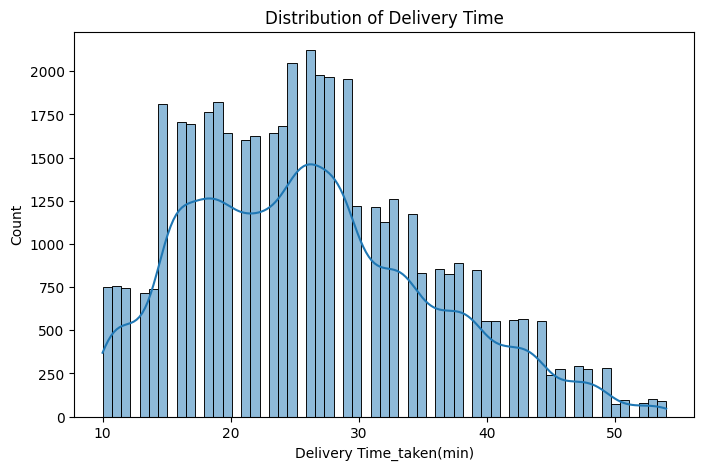

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df['Delivery Time_taken(min)'], kde=True)
plt.title("Distribution of Delivery Time")
plt.show()


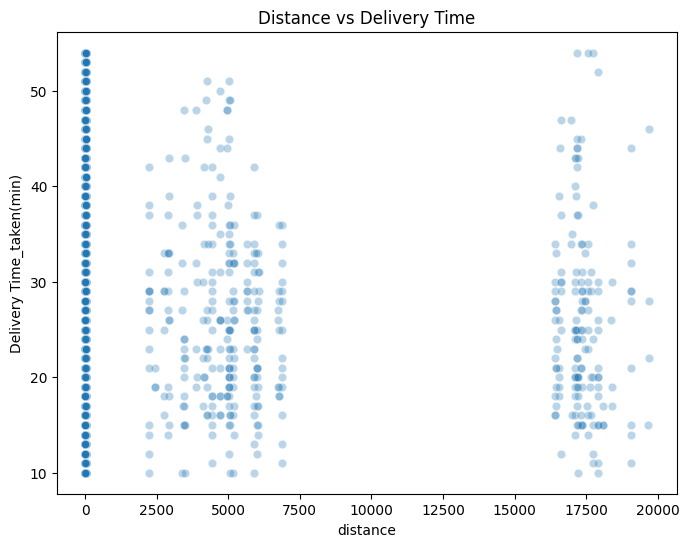

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['distance'], y=df['Delivery Time_taken(min)'], alpha=0.3)
plt.title("Distance vs Delivery Time")
plt.show()


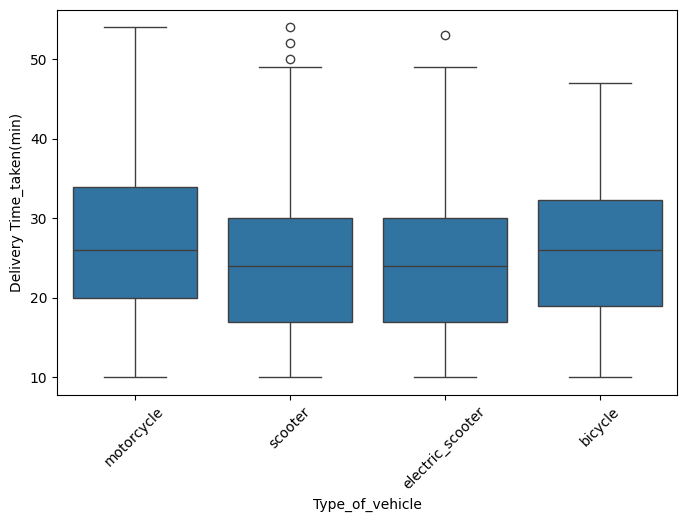

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Type_of_vehicle', y='Delivery Time_taken(min)', data=df)
plt.xticks(rotation=45)
plt.show()


In [25]:
df['Driver_Experience'] = df['Delivery_person_Age'] * df['Delivery_person_Ratings']


In [28]:
df['distance_bucket'] = pd.cut(
    df['distance'],
    bins=[0,3,6,10,20,np.inf],   # Added infinity
    labels=[1,2,3,4,5]
)

# Convert safely
df['distance_bucket'] = df['distance_bucket'].astype('Int64')


In [29]:
y = np.log1p(df['Delivery Time_taken(min)'])


In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100,200],
    'learning_rate': [0.05,0.1],
    'max_depth': [3,5]
}

grid = GridSearchCV(
    GradientBoostingRegressor(),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)


Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}


In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print("CV MAE:", -scores.mean())


CV MAE: 0.22015658649773556


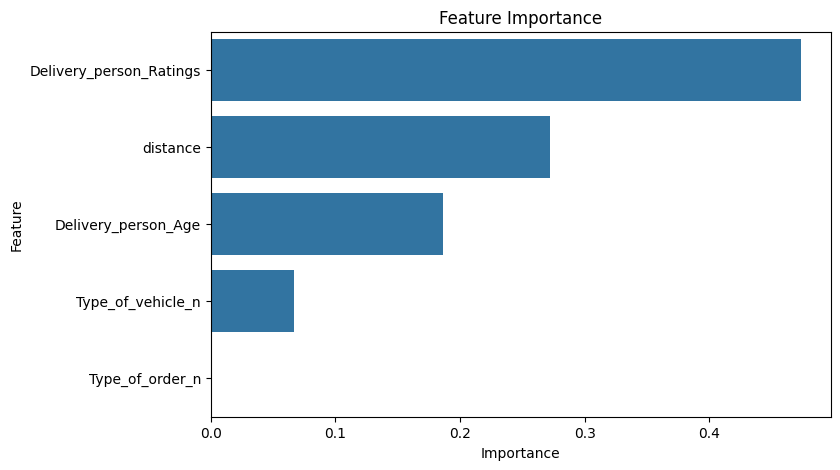

In [31]:
importances = best_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance")
plt.show()


<Axes: xlabel='Delivery Time_taken(min)', ylabel='Count'>

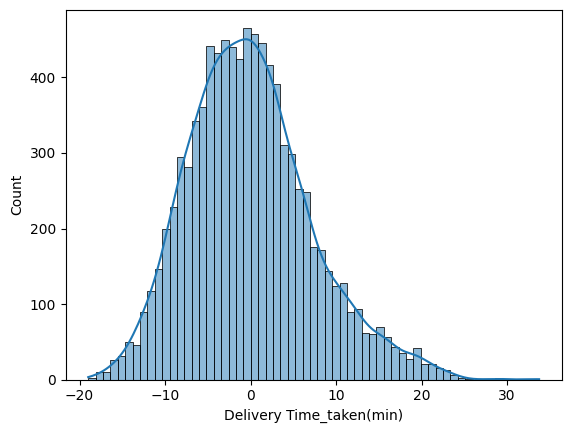

In [34]:
errors = y_test - preds
sns.histplot(errors, kde=True)


In [43]:
joblib.dump(best_model, "delivery_model.pkl")


['delivery_model.pkl']

In [44]:
from google.colab import files
files.download("delivery_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
pip show scikit-learn


Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR